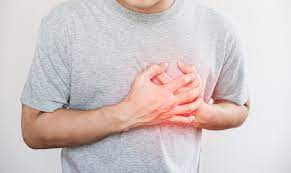

# Heart Disease Prediction Using Decision Tree Classifier

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
%matplotlib inline

In [3]:
#Read out data in PD dataframe
df = pd.read_csv('processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Instead of column names we have just numbers. Its very hard to explore it without column names.Lets replace numbers with names:**
Attribute Information:

Only 14 attributes used:
1.**(age)**
2.**(sex)**
3.**(cp)**,chest pain
4.**(trestbps)**,resting blood pressure
5.**(chol)**,serum cholestoral in mg/dl
6.**(fbs)**,fasting blood pressure
7.**(restecg)**, resting electrocardiographic results
8.**(thalach)**,maximum heart rate achieved
9.**(exang)**,exercise induced angina
10.**oldpeak)**,ST depression induced by exercise relative to rest
11.**(slope)**,the slope of the peak exercise ST segment
12.**(ca)**, number of major vessels (0-3) colored by flourosopy
13.**(thal)**,thalium heart scan
14.**(hd)**, diagnosis heart disease (the predicted attribute)

In [4]:
# column name changes
df.columns = ['age','sex','cp','trestbps','chol','fbs',
             'restecg','thalach','exang','oldpeak',
             'slope','ca','thal','hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
## check the data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

Almost all the columns have float types and int. But ca and thal showing as object lets check what there.

In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

CA values are '0.0', '3.0', '2.0', '1.0' mostly number but '?' is also there.

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

thal value are '6.0', '3.0', '7.0' and ?. Same as ca column lets check it more.

In [12]:
# checking how many rows contain '?' in both columns
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
len(df)

303

Out of 303 rows, 6 rows have missing values. We will drop them. 

In [16]:
df1 = df.loc[(df['ca']!='?') & (df['thal']!='?')]
len(df1)

297

In [19]:
# Now we do not have any missing value
df1.loc[(df1['ca']=='?') | (df1['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd


In [20]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'hd'}>]], dtype=object)

<Figure size 1080x720 with 0 Axes>

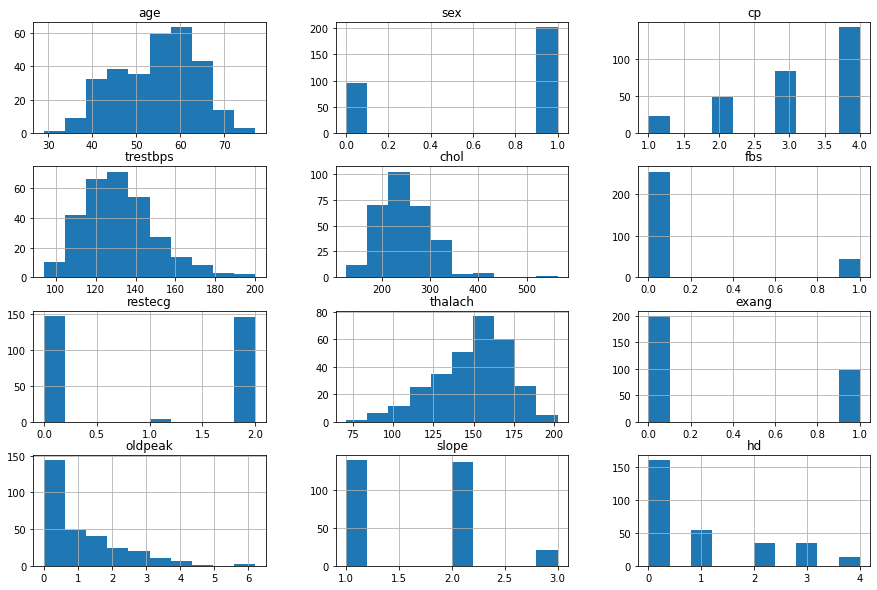

In [23]:

df1.hist(figsize=[15,10])

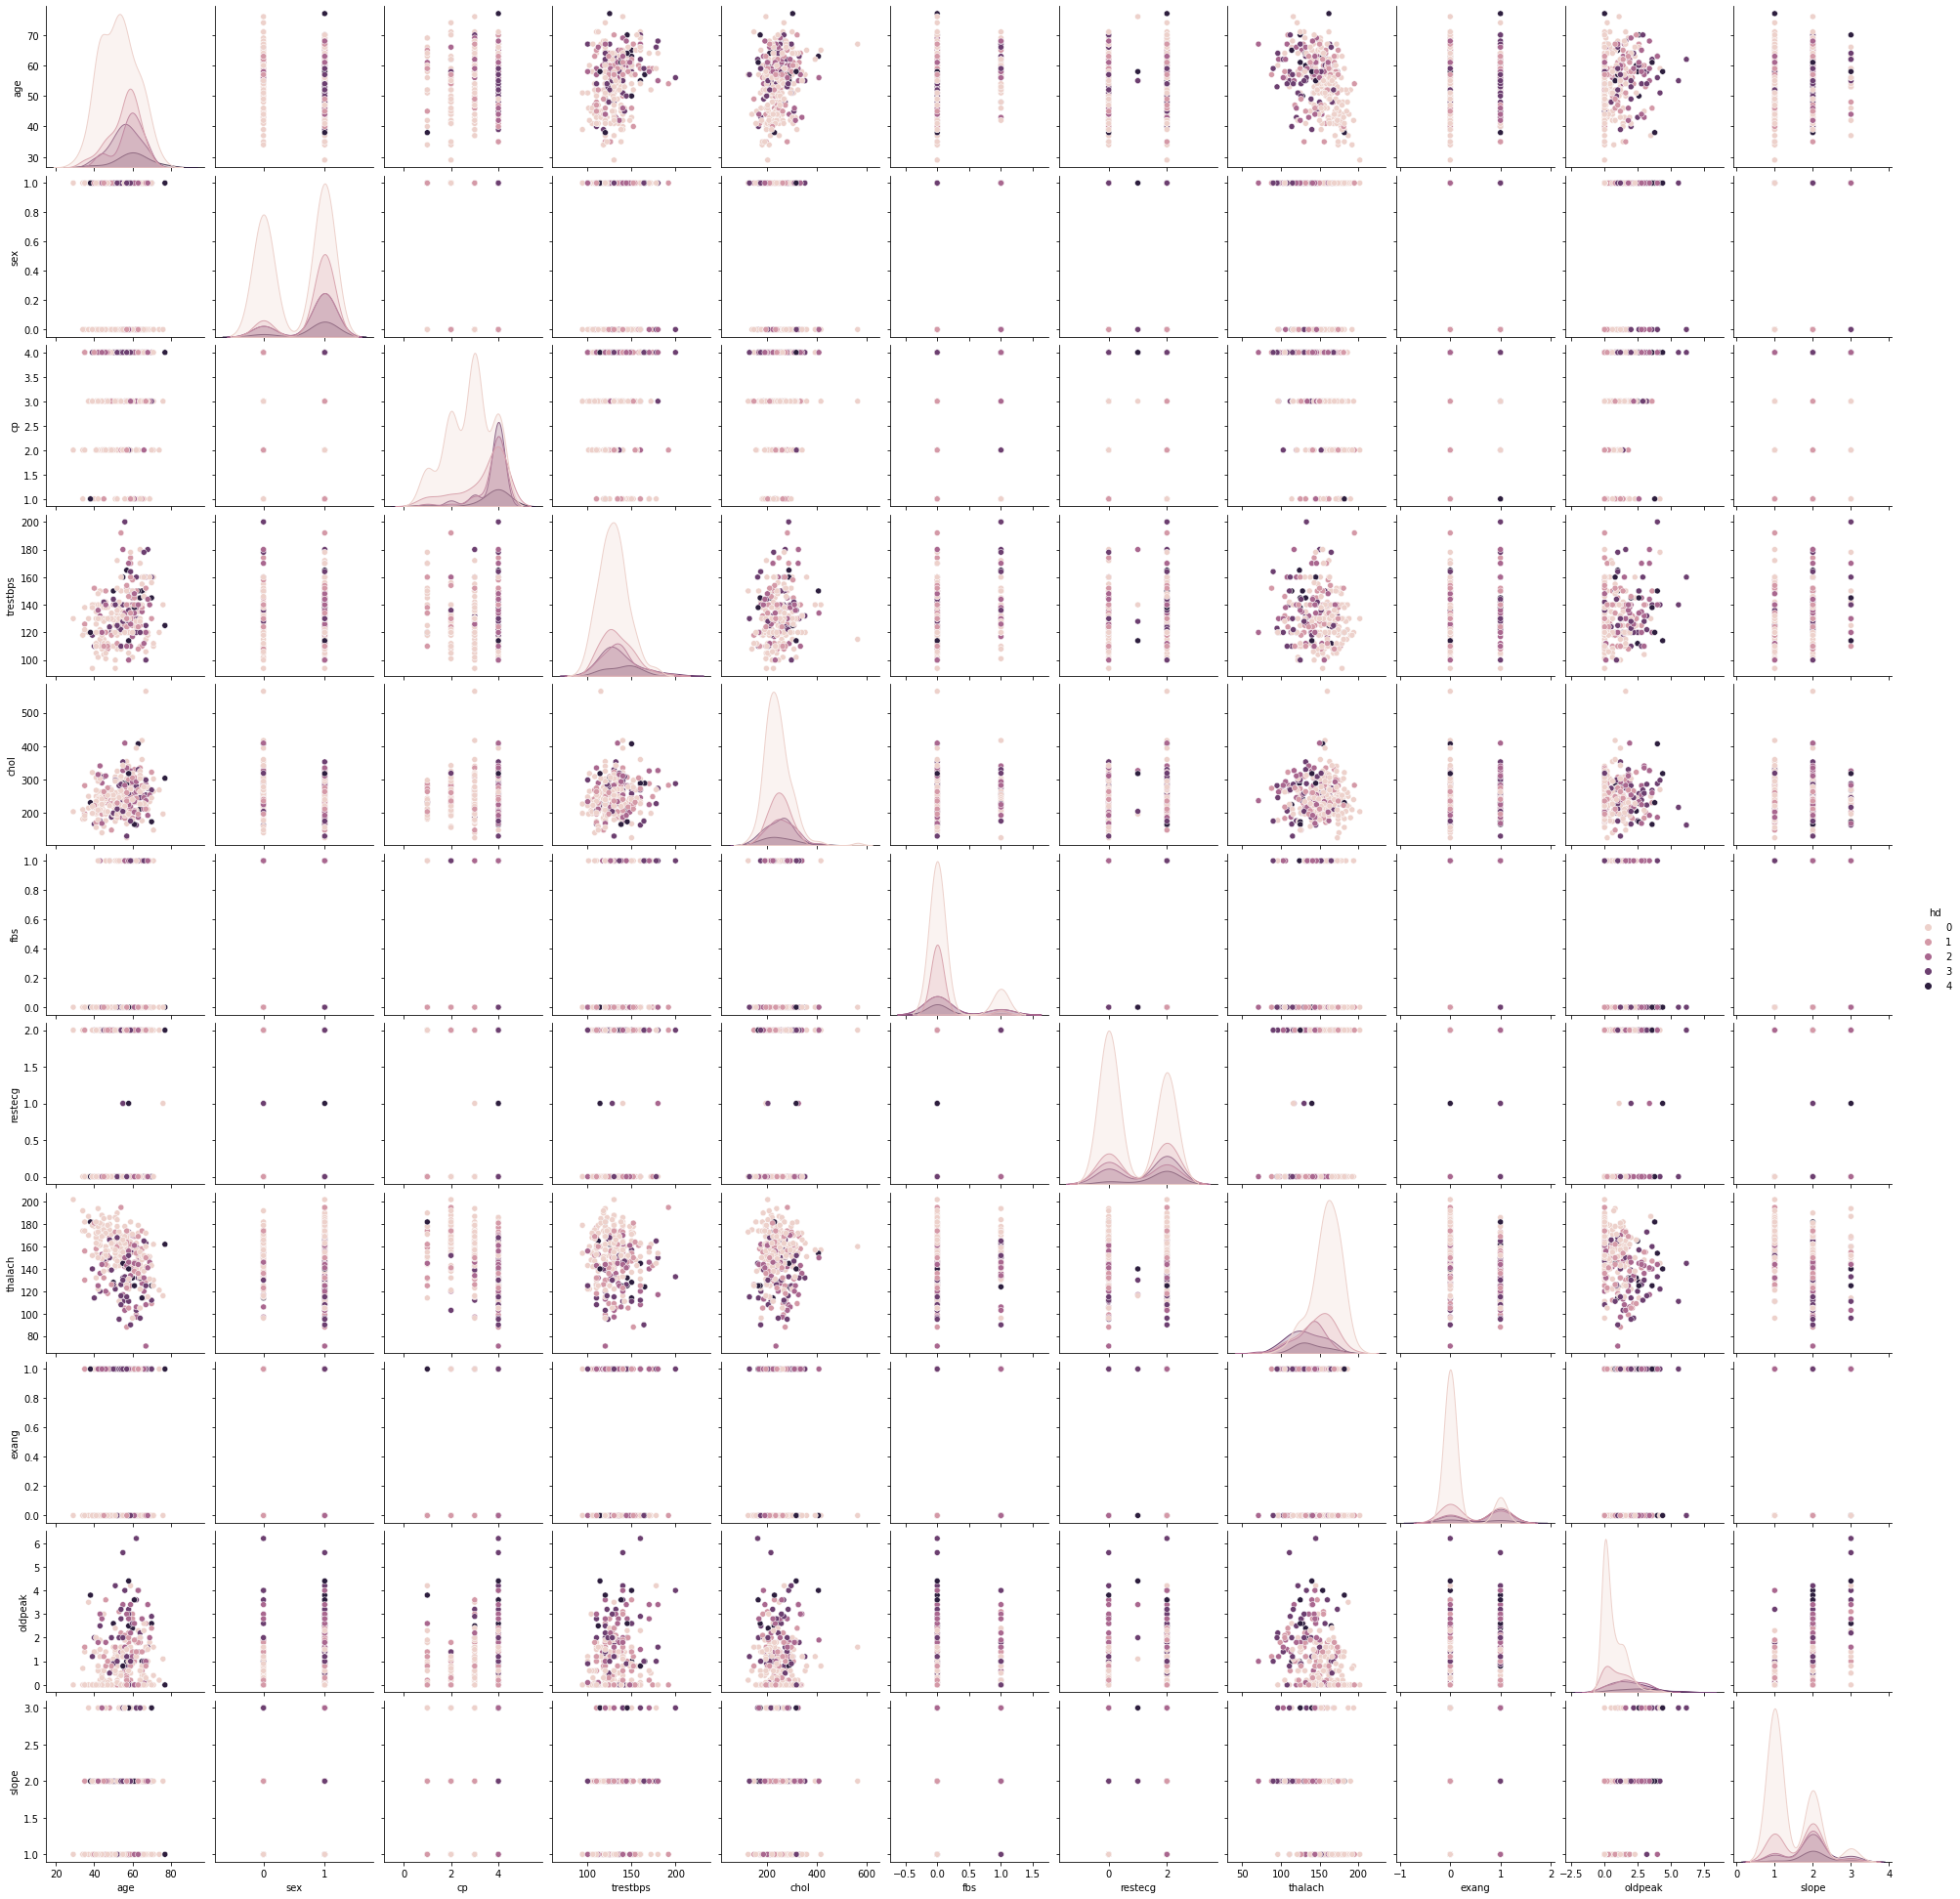

In [25]:
sns.pairplot(df1,hue='hd')

<AxesSubplot:xlabel='hd', ylabel='count'>

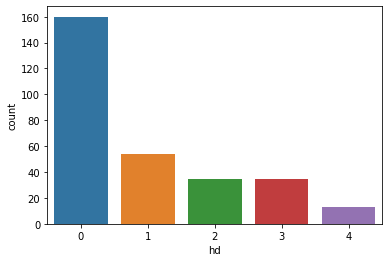

In [27]:
import warnings
warnings.filterwarnings(action='ignore')
sns.countplot(df1['hd'])


<AxesSubplot:xlabel='age', ylabel='Density'>

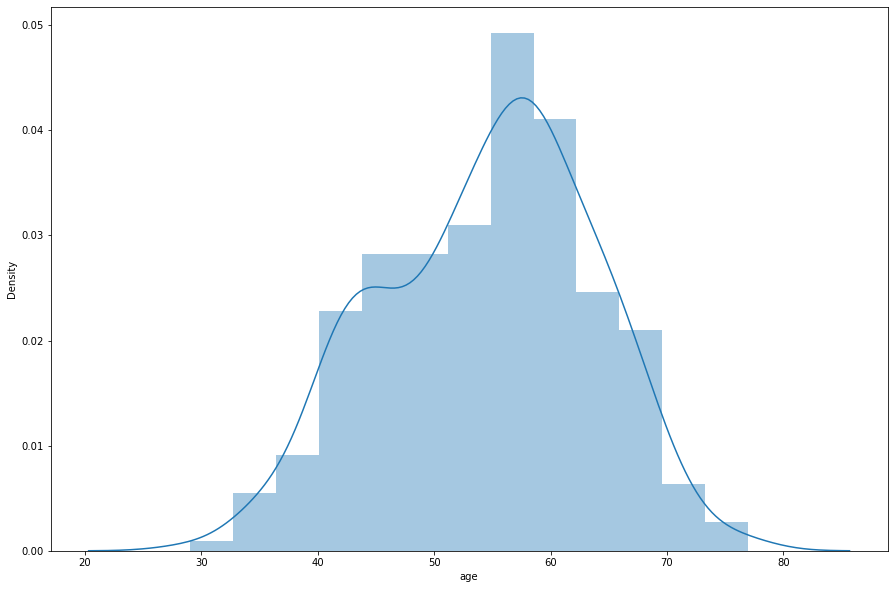

In [33]:
plt.figure(figsize=[15,10])
sns.distplot(df1['age'])

### split data into Dependent and independent variables

In [34]:
X = df1.drop('hd',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [35]:
y = df1['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## ONE-HOT-Encoding

In [36]:
# cp,restecg,slope,thal all are categorical so we will use one-hot encoding there.

X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Now we have 22 columns.

In [37]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

For out target column we only want 0 and 1, means disease or no disease.so converting them 0 and 1.

In [39]:
y_zero = y > 0
y[y_zero] = 1
y.unique()

array([0, 1], dtype=int64)

#### Train Test Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(222, 22) (75, 22) (222,) (75,)


### Training Our Model

In [119]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train,y_train)

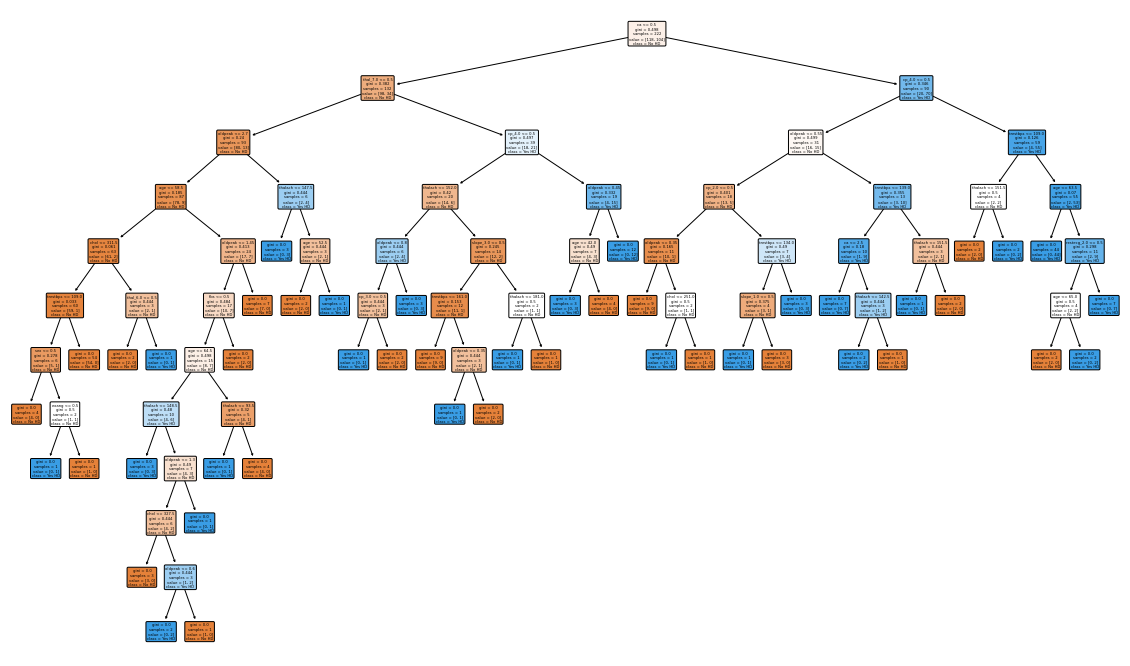

In [120]:
# Plotting the three
plt.figure(figsize=[20,12])
plot_tree(dt,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns);

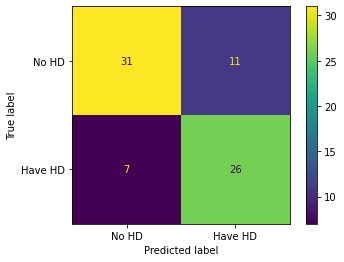

In [121]:
plot_confusion_matrix(dt,X_test,y_test,display_labels=['No HD','Have HD'])

So from total **42** with no disease. Our model predicted **31(73%)** right.
And total **33** people who has disease our model predicted **26(79)** right but we want **False Negative** low.  
For Better result we will **Prune** the tree.

In [122]:
# lets check classification report as well
dt_prd = dt.predict(X_test)
print(classification_report(y_test,dt_prd))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



### Cost Complexity Pruning Part 1 : Visualize Alpha

In [123]:
path = dt.cost_complexity_pruning_path(X_train,y_train) # Determine value of alpha
ccp_alphas = path.ccp_alphas # Extract different value for alpha
ccp_alphas = ccp_alphas[:-1] # Exclude maximum value of alpha

clf_dts = [] # Will put dt infos

# now create one DT per value for alpha and put it in array
for i in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    dt.fit(X_train,y_train)
    clf_dts.append(dt)
    

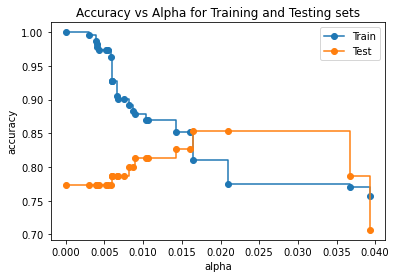

In [124]:
# lets check the training accuracy and testing accuracy with graph
train_score = [dt.score(X_train,y_train) for dt in clf_dts]
test_score  = [dt.score(X_test,y_test) for dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for Training and Testing sets')
ax.plot(ccp_alphas,train_score,marker ='o',label='Train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_score,marker ='o',label='Test',drawstyle='steps-post')
plt.legend()


WE can see that best value for **alpha** is **0.016**

### Cost Complexity Pruning Part 2: Cross Validation to find best Alpha

<AxesSubplot:xlabel='tree'>

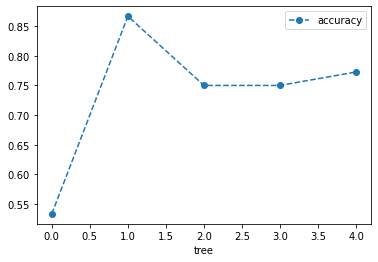

In [125]:
dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) #create tree with alpha =0.024

scores = cross_val_score(dt,X_train,y_train,cv=5)

ndf = pd.DataFrame(data={'tree': range(5),'accuracy': scores})

ndf.plot(x='tree',y='accuracy',marker='o',linestyle='--')


The graph above shows that using different training and testing data with same alpha gives different accuracies. Now we will use cross validation to find optimal alpha

<AxesSubplot:xlabel='alpha'>

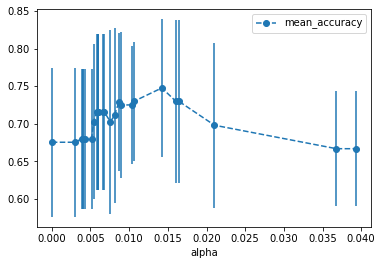

In [126]:
alpha_loop = []

for i in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores = cross_val_score(dt,X_train,y_train,cv=5)
    alpha_loop.append([i,np.mean(scores),np.std(scores)])
    
alpha_result = pd.DataFrame(alpha_loop,columns=['alpha','mean_accuracy','std'])

alpha_result.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

Using cross validation we can find exact value of alpha. As shown below

In [127]:
alpha_result[(alpha_result['alpha']>0.014) & (alpha_result['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [128]:
# storing best value of alpha so we can use it to build best tree


best_alpha = alpha_result[(alpha_result['alpha']>0.014) & (alpha_result['alpha']<0.015)]['alpha']

best_alpha = float(best_alpha)
best_alpha

0.014224751066856332

## Building and Evaluating Final Model or Tree

In [129]:
dt_final = DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
dt1 = dt_final.fit(X_train,y_train)

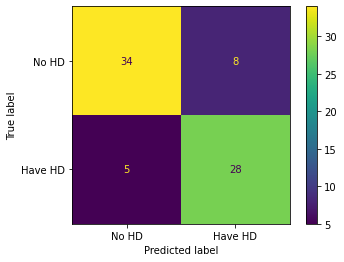

In [130]:
plot_confusion_matrix(dt1,
                     X_test,y_test,display_labels=['No HD','Have HD'])

So from total **42** with no disease. Our model predicted **34(81%)** right. And total **33** people who has disease our model predicted **28(85%)** 
**Much** better than prepruning.

In [135]:
## now lets check classification report
prf_f = dt_final.predict(X_test)

print(classification_report(y_test,prf_f))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



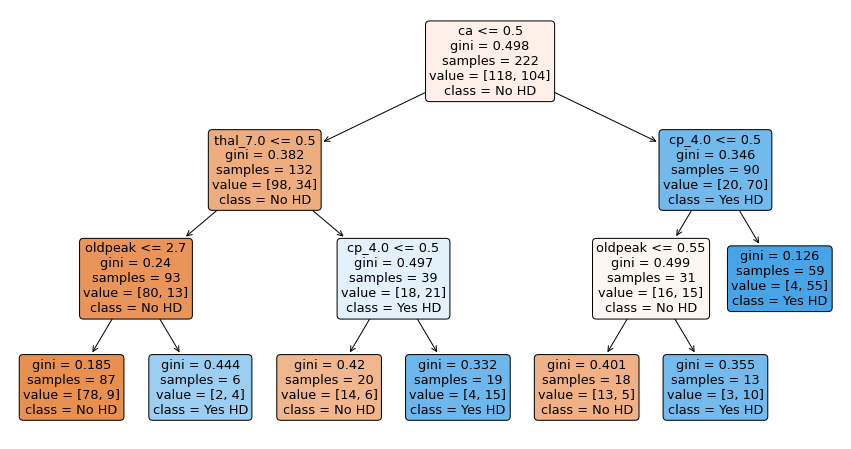

In [136]:
plt.figure(figsize=(15,8))
plot_tree(dt1,filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns);

# Our final Tree giving good results but can be better.